# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Предоставдены данные в табличной форме. 

+ `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    + `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    + `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    + `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    + `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    + `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    + `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    + `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    + `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца. Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    + `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    + `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

+ `market_money.csv` - с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    + `Выручка` — сумма выручки за период.

+ `market_time.csv` - с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксировано общее время.
    + `минут` — значение времени, проведённого на сайте, в минутах.

+ `money.csv` - с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Прибыль` — значение прибыли.


План работы:

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод


## 1 Загрузка данных

### 1.1 Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import phik
import seaborn as sns
import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, 
                                     RandomizedSearchCV
                                    )
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score,
                             roc_auc_score
                            )
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler,
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   RobustScaler,
                                   StandardScaler
                                  )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### 1.2 Загрузка данных

In [2]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv', decimal = ',')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', decimal = ',')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [3]:
try:
    market_money = pd.read_csv('/datasets/market_money.csv', decimal = ',')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', decimal = ',')
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [4]:
try:
    market_time = pd.read_csv('/datasets/market_time.csv', decimal = ',')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', decimal = ',')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [5]:
try:
    money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep = ';', decimal = ',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


#### Вывод по загрузке данных:
1. Были импортированы нужные библиотеки, конкретные классы и модели.
2. Датасеты были успешно загружены в market_file, market_money, market_time, money.

## 2 Предобработка данных

### 2.1 Предобработка `market_file`

In [6]:
# Изменение названий столбцов
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')
# Исправление данных
market_file.тип_сервиса = market_file.тип_сервиса.replace(['стандартт'],'стандарт')
# Изменение типов
market_file.маркет_актив_6_мес = market_file.маркет_актив_6_мес.astype(float) 
market_file.акционные_покупки = market_file.акционные_покупки.astype(float)
print('Явных дубликатов:', market_file.duplicated().sum(), '\n')
market_file.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_с

### 2.2 Предобработка `market_money`

In [7]:
market_money.Период.unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [8]:
# Изменение названий столбцов
market_money.columns = map(str.lower, market_money.columns)
# Изменение типов
market_money.выручка = market_money.выручка.astype(float)
print('Явных дубликатов:', market_money.duplicated().sum(), '\n')
market_money.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### 2.3 Предобработка `market_time`

In [9]:
# Изменение названий столбцов
market_time.columns = map(str.lower, market_time.columns)
# Исправление данных
market_time.период = market_time.период.replace(['предыдцщий_месяц'],'предыдущий_месяц')
print('Явных дубликатов:', market_time.duplicated().sum(), '\n')
market_time.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


### 2.4 Предобработка `money`

In [10]:
money.columns = map(str.lower, money.columns)
print('Явных дубликатов:', money.duplicated().sum(), '\n')
money.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


#### Вывод по предобработке данных:

1. В представленных данных пропуски не обнаружены
2. Произведено изменение названий столбцов:
    + перевод в строчный формат
    + замена пробелов на подчеркивание
3. В `market_file` 
    + в колонке `тип_сервиса` данные `стандартт` заменены на `стандарт`
    + изменены типы стоблцов
    + `маркет_актив_6_мес` на `float`
    + `акционные_покупки` на `float`
4. В `market_money`
    + в колонке `период`данные `препредыдущий_месяц` заменены на `предыдущий_месяц`
    + изменен тип столбца
    + `выручка` на `float`
5. В `market_time`
    + в колонке `период` данные `предыдцщий_месяц` заменены на `предыдущий_месяц`

## 3 Исследовательский анализ данных

Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

### 3.1 Анализ числовых значений `market_file`

In [11]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


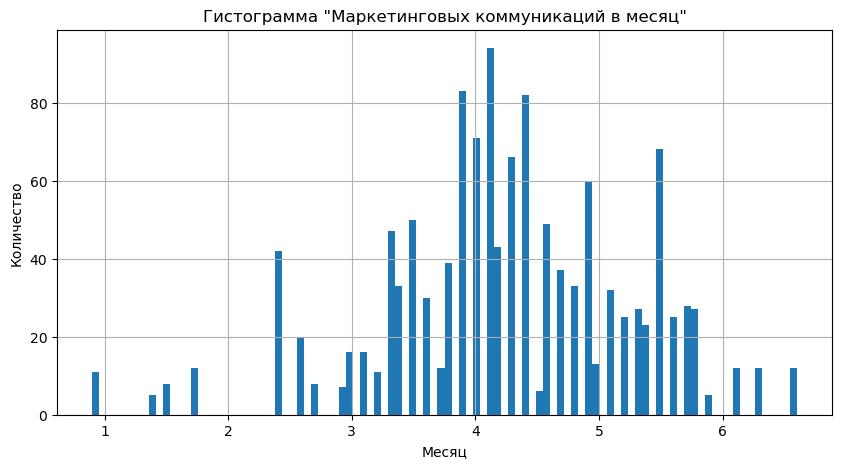

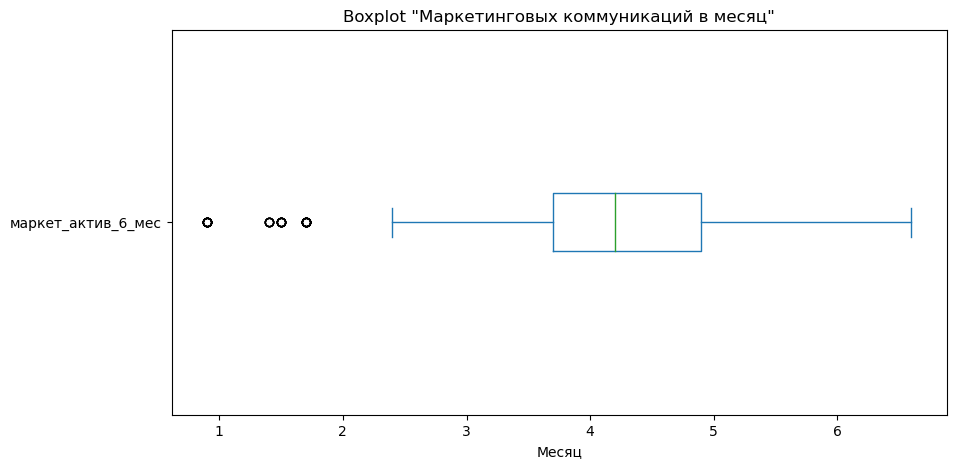

In [12]:
(
    market_file['маркет_актив_6_мес']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Маркетинговых коммуникаций в месяц"')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

(
    market_file['маркет_актив_6_мес']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Маркетинговых коммуникаций в месяц"')
plt.xlabel('Месяц')
plt.show()

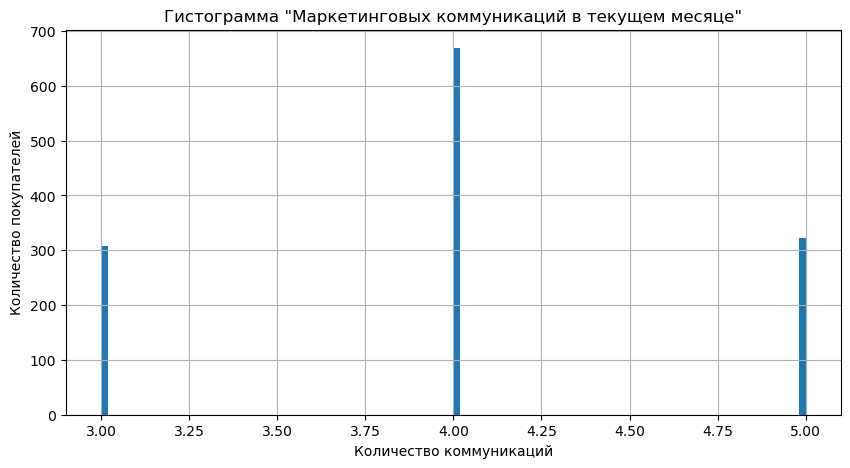

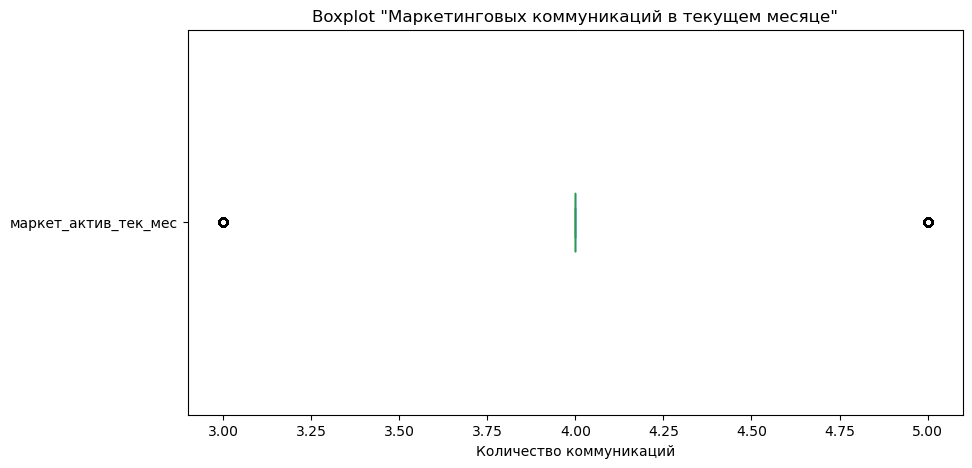

In [13]:
(
    market_file['маркет_актив_тек_мес']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Маркетинговых коммуникаций в текущем месяце"')
plt.xlabel('Количество коммуникаций')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['маркет_актив_тек_мес']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Маркетинговых коммуникаций в текущем месяце"')
plt.xlabel('Количество коммуникаций')
plt.show()

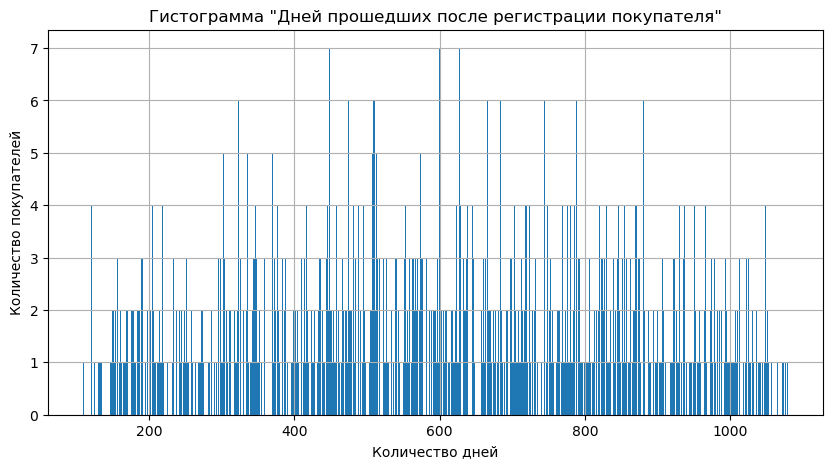

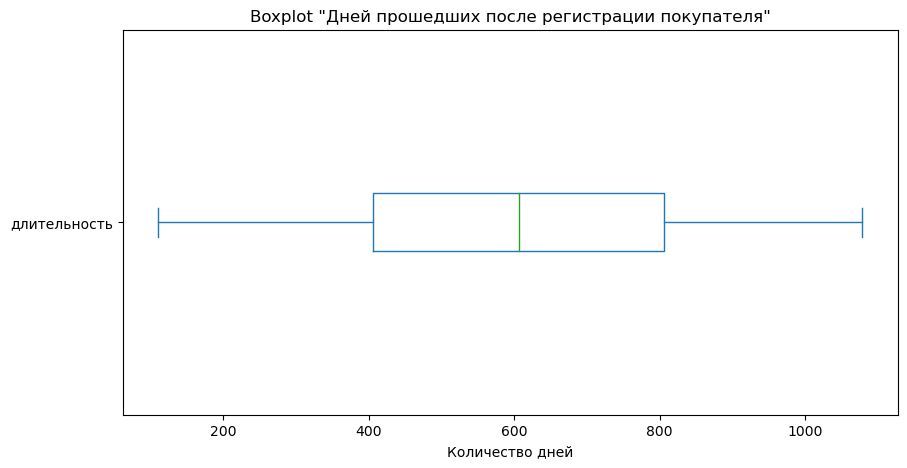

In [14]:
(
    market_file['длительность']
    .plot(kind='hist', bins=1000, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Дней прошедших после регистрации покупателя"')
plt.xlabel('Количество дней')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['длительность']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Дней прошедших после регистрации покупателя"')
plt.xlabel('Количество дней')
plt.show()

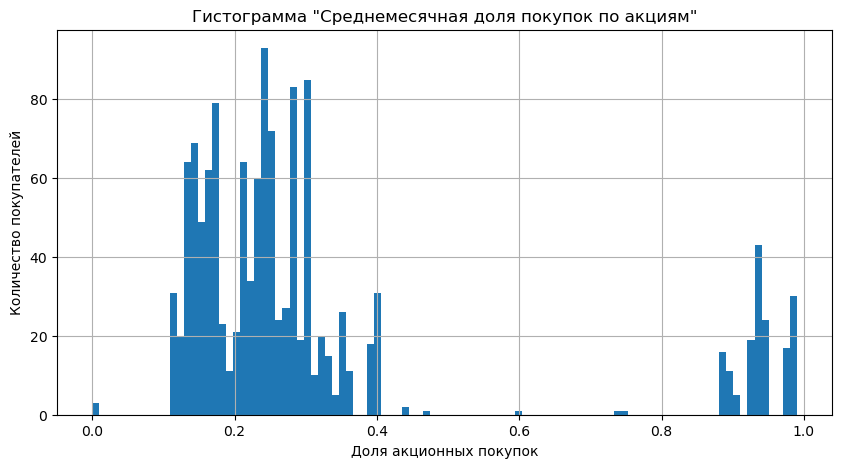

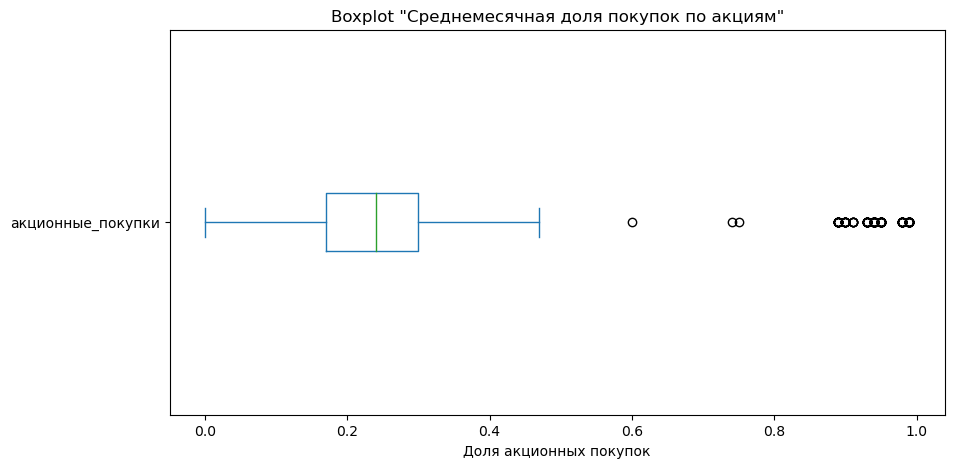

In [15]:
(
    market_file['акционные_покупки']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Среднемесячная доля покупок по акциям"')
plt.xlabel('Доля акционных покупок')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['акционные_покупки']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Среднемесячная доля покупок по акциям"')
plt.xlabel('Доля акционных покупок')
plt.show()

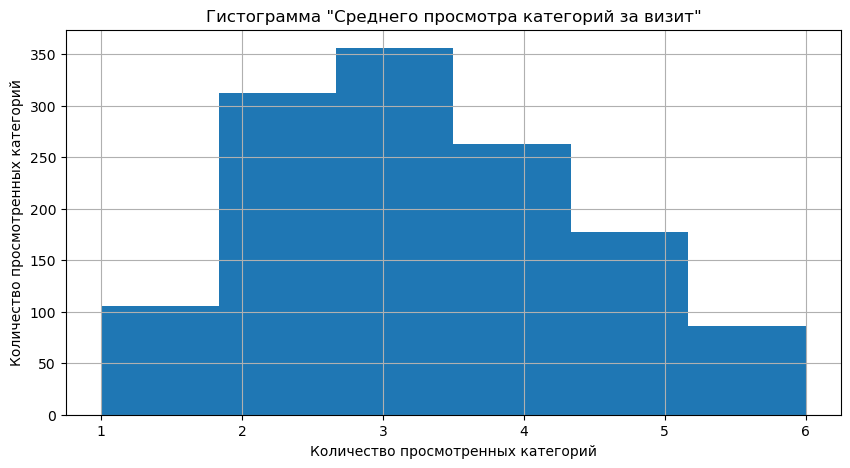

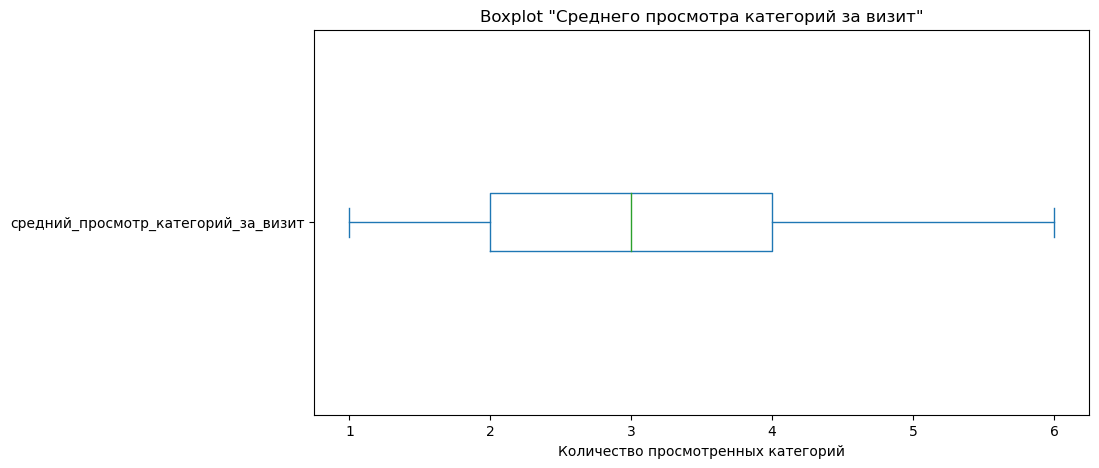

In [16]:
(
    market_file['средний_просмотр_категорий_за_визит']
    .plot(kind='hist', bins=6, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Среднего просмотра категорий за визит"')
plt.xlabel('Количество просмотренных категорий')
plt.ylabel('Количество просмотренных категорий')
plt.show()

(
    market_file['средний_просмотр_категорий_за_визит']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Среднего просмотра категорий за визит"')
plt.xlabel('Количество просмотренных категорий')
plt.show()

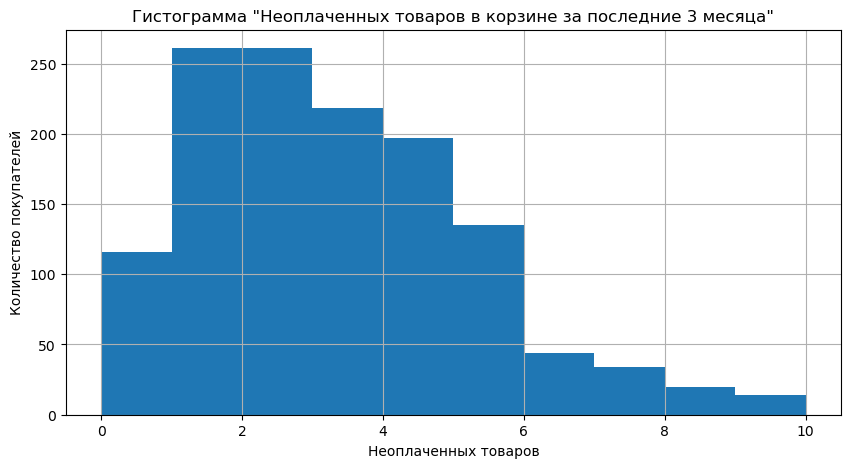

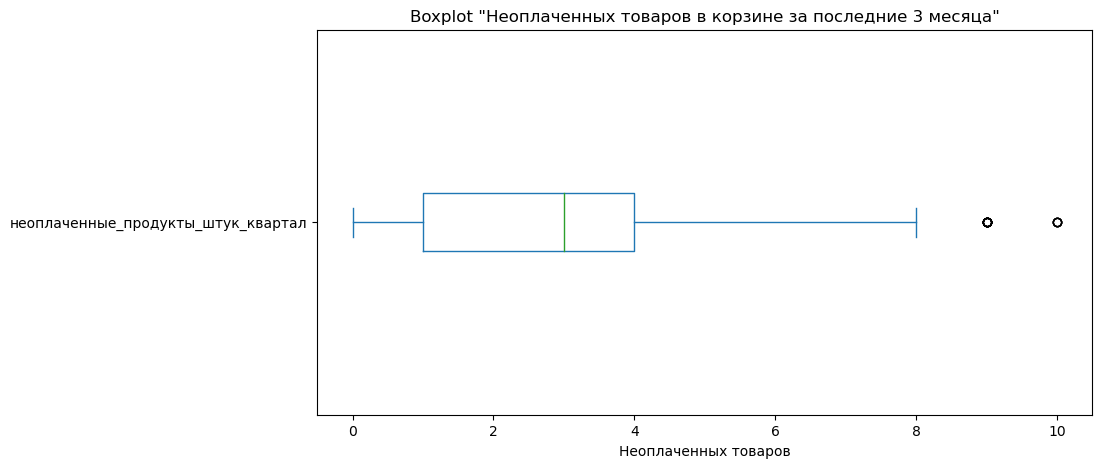

In [17]:
(
    market_file['неоплаченные_продукты_штук_квартал']
    .plot(kind='hist', bins=10, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Неоплаченных товаров в корзине за последние 3 месяца"')
plt.xlabel('Неоплаченных товаров')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['неоплаченные_продукты_штук_квартал']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Неоплаченных товаров в корзине за последние 3 месяца"')
plt.xlabel('Неоплаченных товаров')
plt.show()

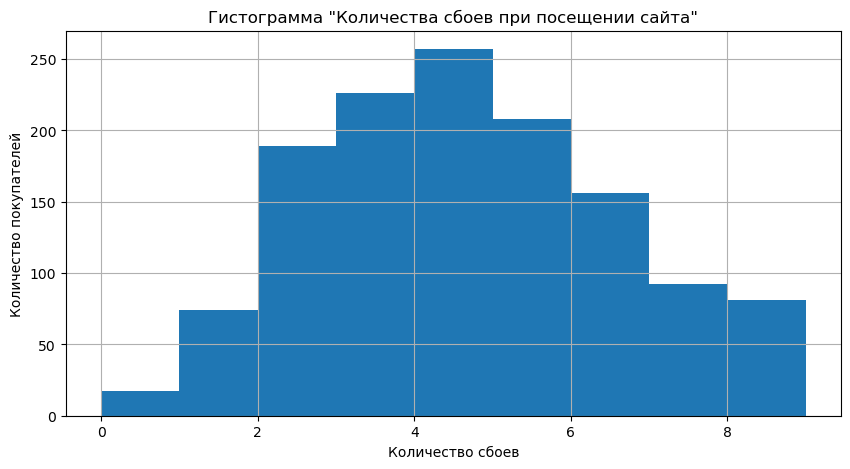

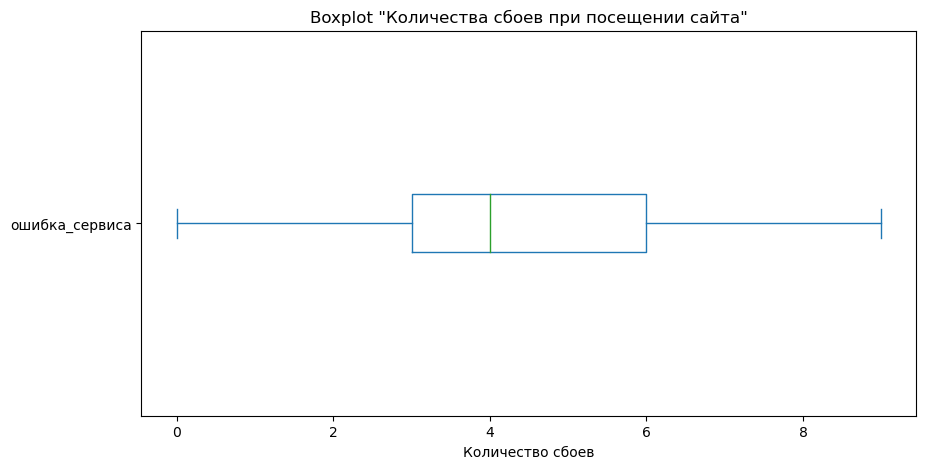

In [18]:
(
    market_file['ошибка_сервиса']
    .plot(kind='hist', bins=9, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Количества сбоев при посещении сайта"')
plt.xlabel('Количество сбоев')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['ошибка_сервиса']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Количества сбоев при посещении сайта"')
plt.xlabel('Количество сбоев')
plt.show()

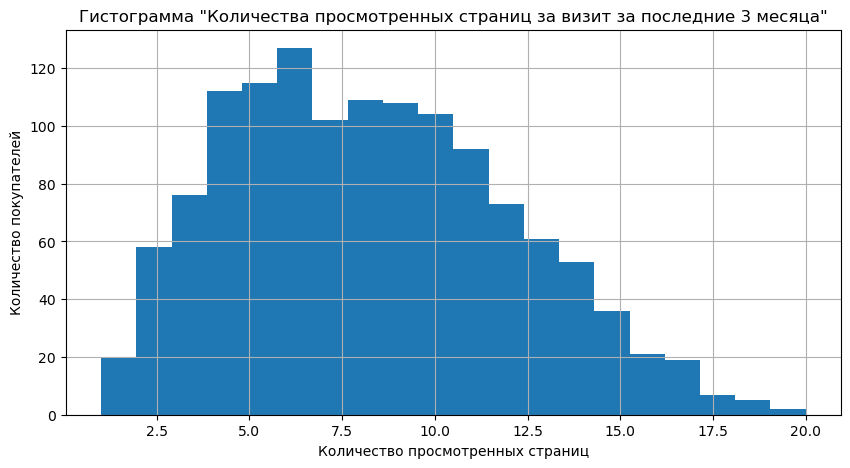

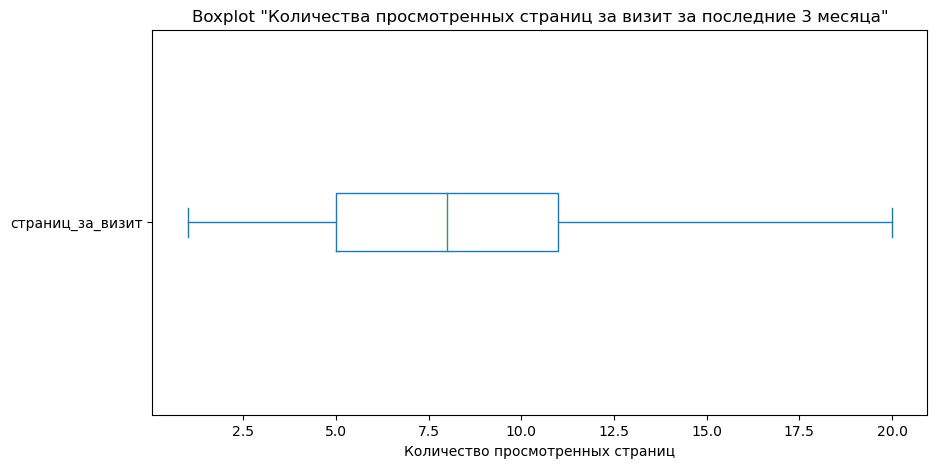

In [19]:
(
    market_file['страниц_за_визит']
    .plot(kind='hist', bins=20, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Количества просмотренных страниц за визит за последние 3 месяца"')
plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_file['страниц_за_визит']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Количества просмотренных страниц за визит за последние 3 месяца"')
plt.xlabel('Количество просмотренных страниц')
plt.show()

### 3.2 Анализ строковых значений `market_file`

In [20]:
market_file.describe(include='object')

,покупательская_активность,тип_сервиса,разрешить_сообщать,популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


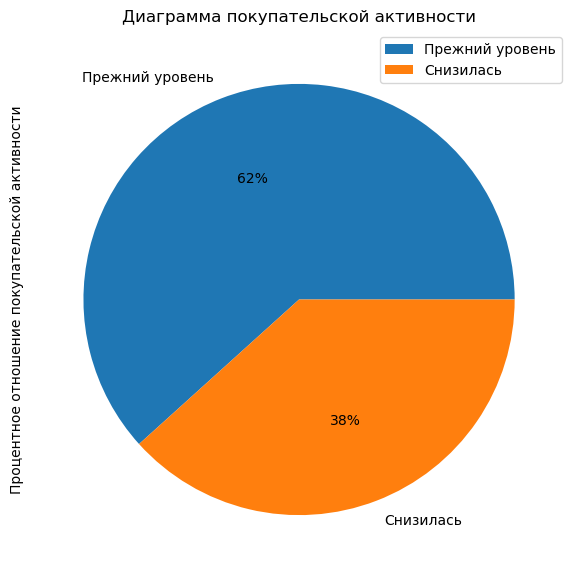

In [21]:
(
market_file
    .pivot_table(index='покупательская_активность',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7), 
              label='Процентное отношение покупательской активности')
)
plt.title('Диаграмма покупательской активности')
plt.show()

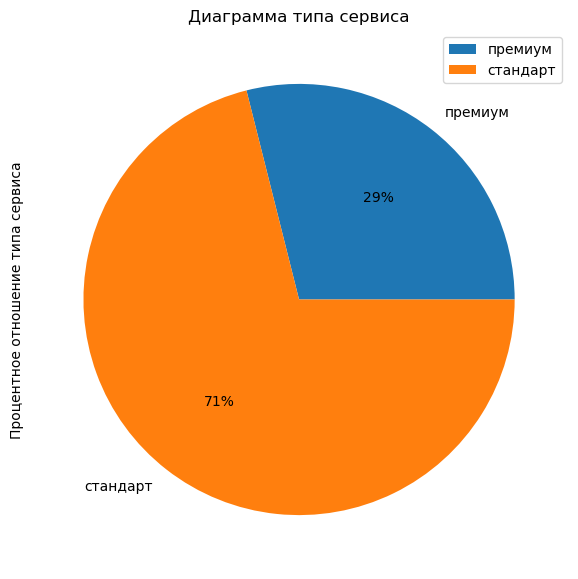

In [22]:
(
market_file
    .pivot_table(index='тип_сервиса',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7), 
              label='Процентное отношение типа сервиса')
)
plt.title('Диаграмма типа сервиса')
plt.show()

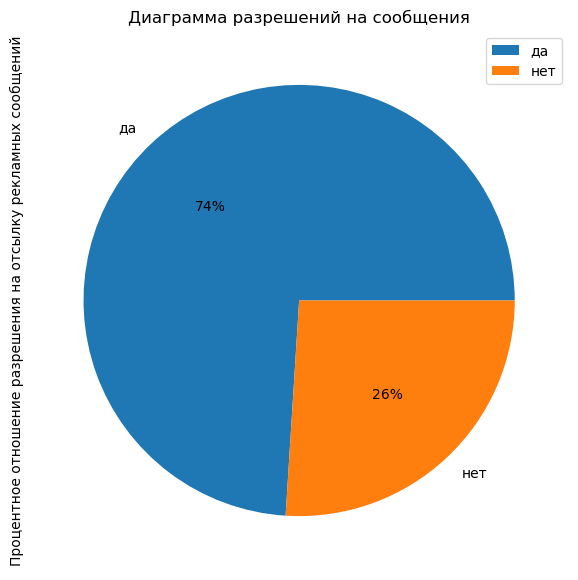

In [23]:
(
market_file
    .pivot_table(index='разрешить_сообщать',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7), 
              label='Процентное отношение разрешения на отсылку рекламных сообщений')
)
plt.title('Диаграмма разрешений на сообщения')
plt.show()

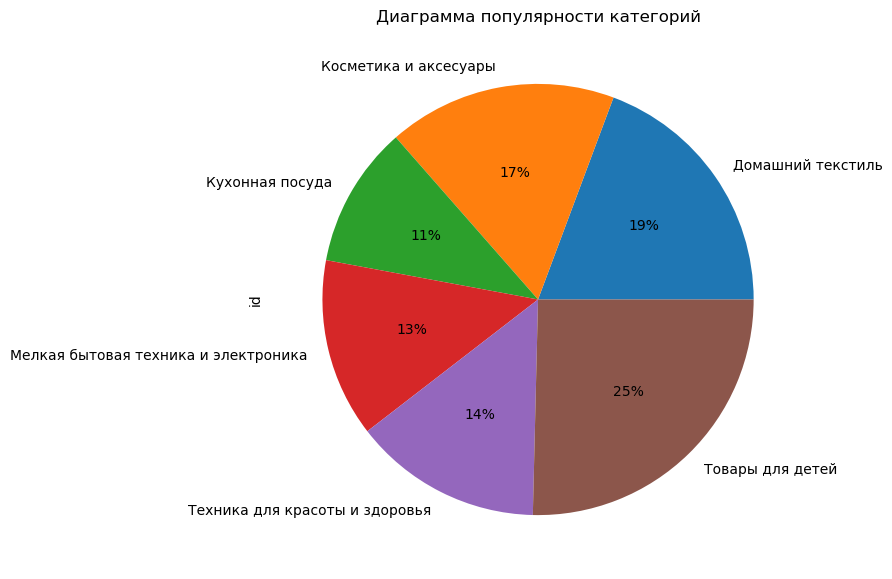

In [24]:
(
market_file
    .pivot_table(index='популярная_категория',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7))              
)
plt.title('Диаграмма популярности категорий')
plt.legend().remove()
plt.show()

### 3.3 Анализ `market_money`

In [25]:
market_money = market_money[market_money.id.isin(market_money.query('выручка==0')['id'].unique())==False] 
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


### 3.4 Анализ числовых значений `market_money`

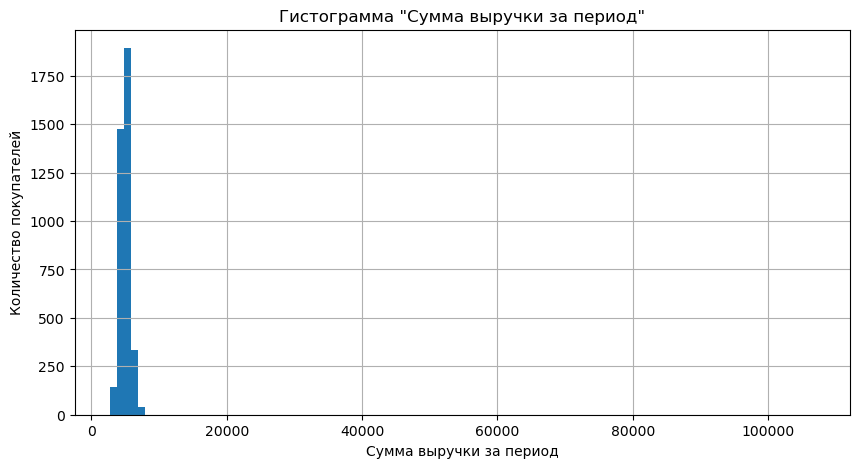

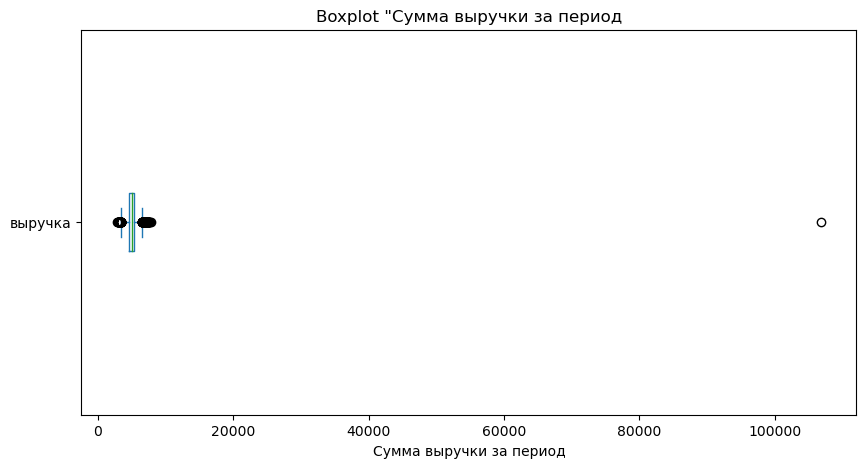

In [26]:
(
    market_money['выручка']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Сумма выручки за период"')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_money['выручка']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.show()

In [27]:
market_money.sort_values(by='выручка', ascending=False).head()

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8


Возможно это оптовый покупатель или подведение итогов за период, возможно ошибка при вводе данных. Примем решение заменить на медианное значение.

In [28]:
market_money.loc[98,'выручка'] = market_money['выручка'].median()
market_money.iloc[[98]]

,id,период,выручка
107,215383,текущий_месяц,5989.0


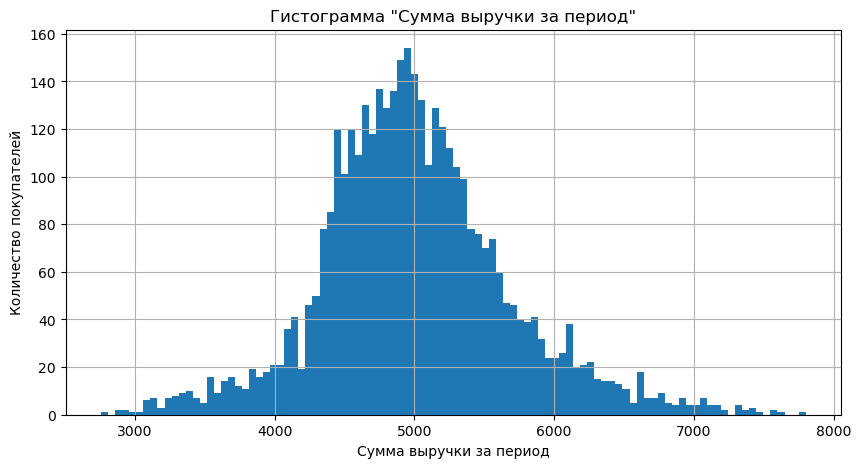

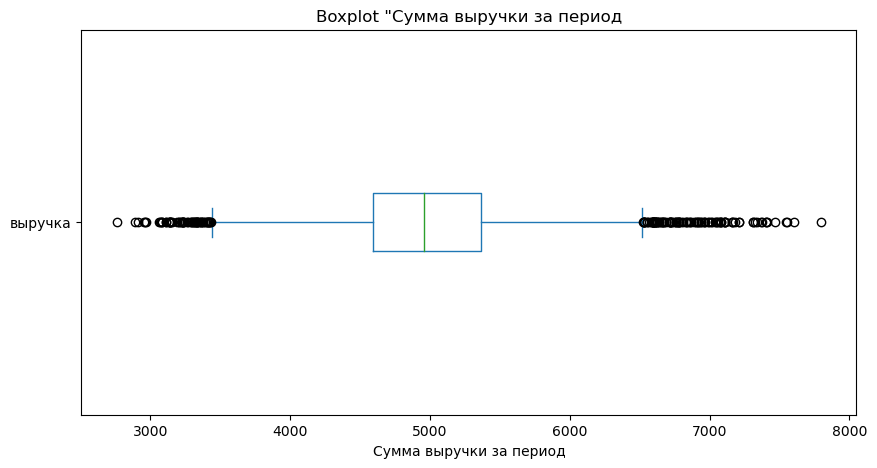

In [29]:
(
    market_money['выручка']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Сумма выручки за период"')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_money['выручка']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.show()

### 3.5 Анализ строковых значений `market_money`

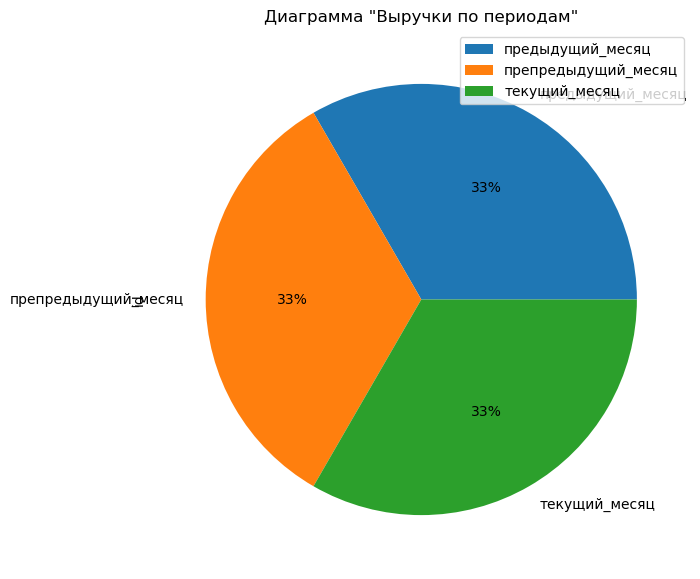

In [30]:
(
market_money
    .pivot_table(index='период', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7))
)
plt.title('Диаграмма "Выручки по периодам"')
plt.show()

### 3.6 Анализ числовых значений `market_time`

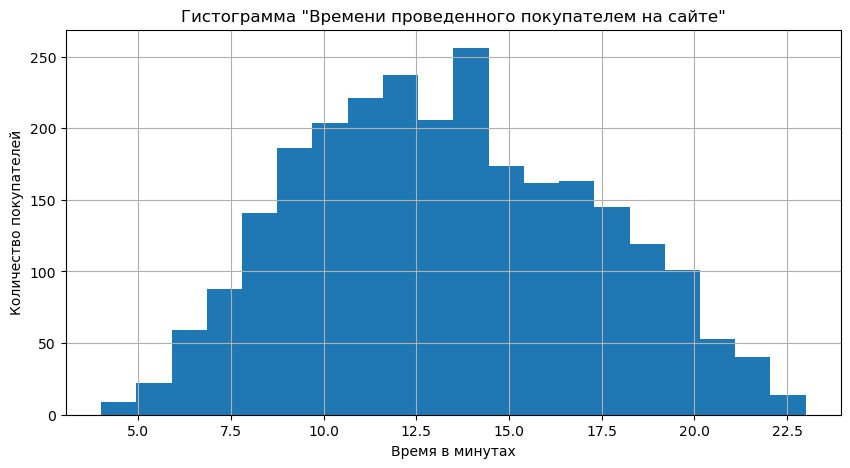

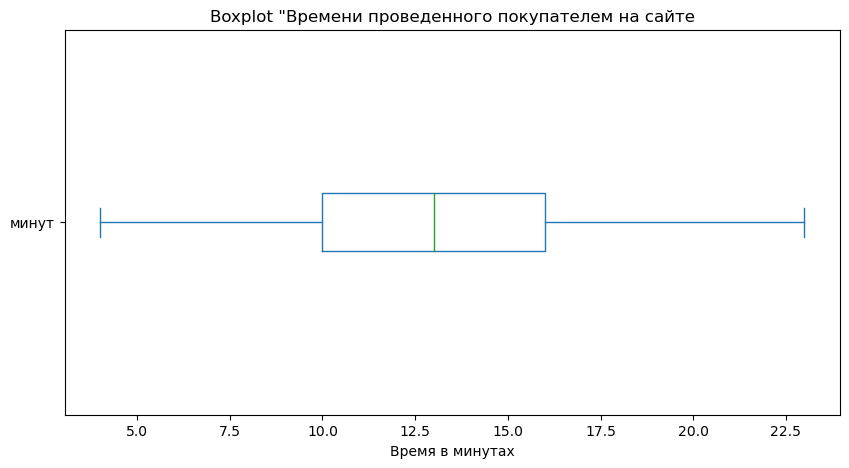

In [31]:
(
    market_time['минут']
    .plot(kind='hist', bins=20, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Времени проведенного покупателем на сайте"')
plt.xlabel('Время в минутах')
plt.ylabel('Количество покупателей')
plt.show()

(
    market_time['минут']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Времени проведенного покупателем на сайте')
plt.xlabel('Время в минутах')
plt.show()

### 3.7 Анализ строковых значений `market_time`

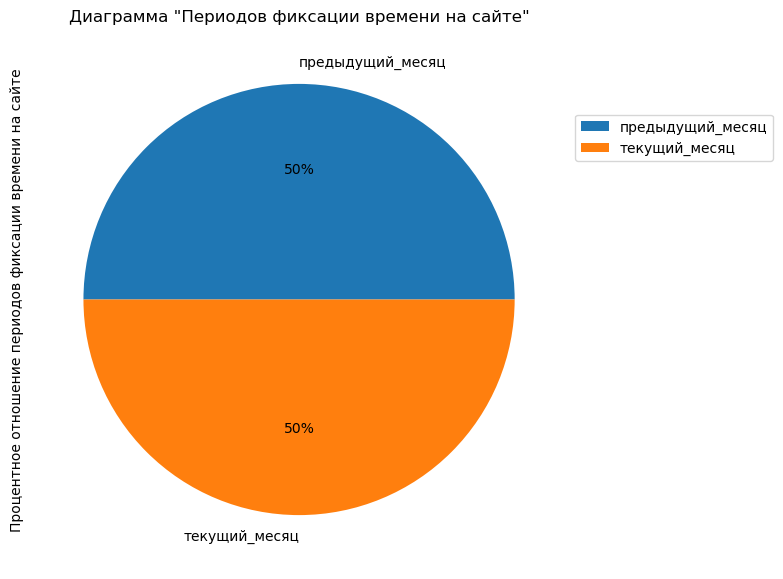

In [32]:
(
market_time
    .pivot_table(index='период', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7), 
              label='Процентное отношение периодов фиксации времени на сайте')
)
plt.title('Диаграмма "Периодов фиксации времени на сайте"')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

### 3.8 Анализ числовых значений `money`

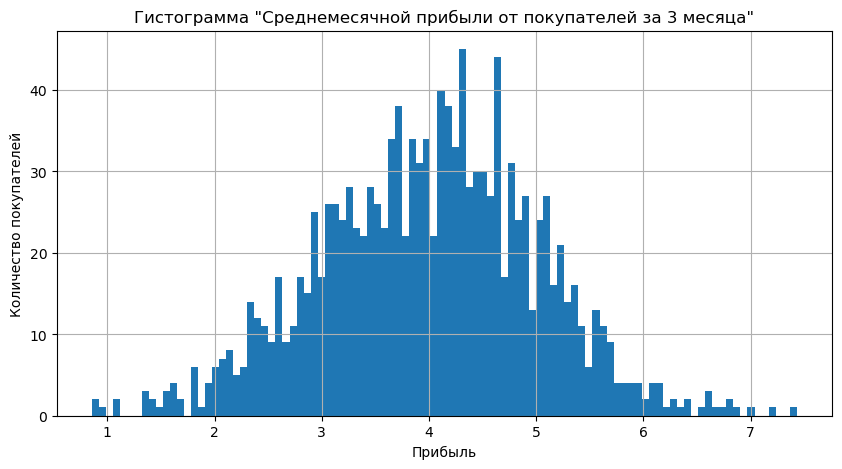

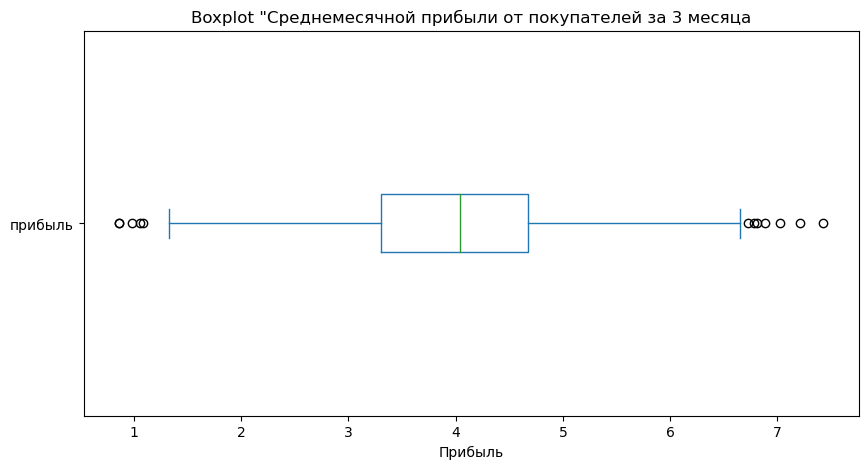

In [33]:
(
    money['прибыль']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Среднемесячной прибыли от покупателей за 3 месяца"')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')
plt.show()

(
    money['прибыль']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Среднемесячной прибыли от покупателей за 3 месяца')
plt.xlabel('Прибыль')
plt.show()

#### Вывод по исследовательскому анализу данных:
1. Представленные данные в своем большинстве распределены нормально.
2. В большинстве данных обнаружены выбросы.
3. Столбцы `период` в `market_money` и `market_time` являются разными по своей значимости, но названия одинаковые, это необходимо учитывать при объединении таблиц.
4. Активные пользователи за последние 3 месяца (делали покупки каждый месяц) отобраны, полный перечень находится в таблице `market_money`.

## 4 Объединение таблиц

###  4.1 Подготовка таблиц перед объединением

In [34]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

### 4.2 Подготовка `market_time`

In [35]:
print(market_time.info(), '\n')

df_1 = market_time[market_time['период']=='предыдущий_месяц'].copy()
df_1.rename(columns={'минут':'минут_предыдущего_месяца'},inplace=True)
df_1.drop('период', axis= 1 , inplace= True )

df_2 = market_time[market_time['период']=='текущий_месяц'].copy()
df_2.rename(columns={'минут':'минут_текущего_месяца'},inplace=True)
df_2.drop('период', axis= 1 , inplace= True )

df_market_time = pd.merge(df_1, df_2, on='id', sort=True)

print(df_market_time.info())
df_market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1300 non-null   int64
 1   минут_предыдущего_месяца  1300 non-null   int64
 2   минут_текущего_месяца     1300 non-null   int64
dtypes: int64(3)
memory usage: 40.6 KB
None


,id,минут_предыдущего_месяца,минут_текущего_месяца
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


### 4.3 Подготовка `market_money`

In [36]:
df_1 = market_money[market_money['период']=='текущий_месяц'].copy()
df_1.rename(columns={'выручка':'выручка_предыдущего_месяца'},inplace=True)
df_1.drop('период', axis= 1 , inplace= True )
df_2 = market_money[market_money['период']=='предыдущий_месяц'].copy()
df_2.rename(columns={'выручка':'выручка_текущего_месяца'},inplace=True)
df_2.drop('период', axis= 1 , inplace= True )
df_3 = market_money[market_money['период']=='препредыдущий_месяц'].copy()
df_3.rename(columns={'выручка':'выручка_препредыдущего_месяца'},inplace=True)
df_3.drop('период', axis= 1 , inplace= True )
df_market_money = pd.merge(df_1, df_2, on='id', sort=True)
df_market_money = pd.merge(df_3, df_market_money, on='id', sort=True)
print(df_market_money.info())
df_market_money.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1297 non-null   int64  
 1   выручка_препредыдущего_месяца  1297 non-null   float64
 2   выручка_предыдущего_месяца     1297 non-null   float64
 3   выручка_текущего_месяца        1297 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.7 KB
None


,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца
0,215349,4472.0,4971.6,5216.0
1,215350,4826.0,5058.4,5457.5
2,215351,4793.0,6610.4,6158.0
3,215352,4594.0,5872.5,5807.5
4,215353,5124.0,5388.5,4738.5


### 4.4 Объединение таблиц `market_file`, `market_money`, `market_time`

In [37]:
df = pd.merge(df_market_money, pd.merge(df_market_time, market_file, on='id', sort=True), on='id', sort=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   выручка_препредыдущего_месяца        1297 non-null   float64
 2   выручка_предыдущего_месяца           1297 non-null   float64
 3   выручка_текущего_месяца              1297 non-null   float64
 4   минут_предыдущего_месяца             1297 non-null   int64  
 5   минут_текущего_месяца                1297 non-null   int64  
 6   покупательская_активность            1297 non-null   object 
 7   тип_сервиса                          1297 non-null   object 
 8   разрешить_сообщать                   1297 non-null   object 
 9   маркет_актив_6_мес                   1297 non-null   float64
 10  маркет_актив_тек_мес                 1297 non-null   int64  
 11  длительность                  

,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца,минут_предыдущего_месяца,минут_текущего_месяца,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,4472.0,4971.6,5216.0,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,4826.0,5058.4,5457.5,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,4793.0,6610.4,6158.0,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,4594.0,5872.5,5807.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,5124.0,5388.5,4738.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


#### Вывод по объединению таблиц
Данные успешно объедены в `df` проведено преобразование данных:
   + столбец `выручка` удален созданы новые столбцы:
        + `выручка_препредыдущего_месяца`
        + `выручка_предыдущего_месяца`
        + `выручка_текущего_месяца`
        
   + столбец `минут` удален созданы новые столбцы:
        + `минут_предыдущего_месяца`
        + `минут_текущего_месяца`

## 5 Корреляционный анализ

Построим тепловую карту корреляции Спирмена для количественных данных распределение которых ненормальное с выбросами.

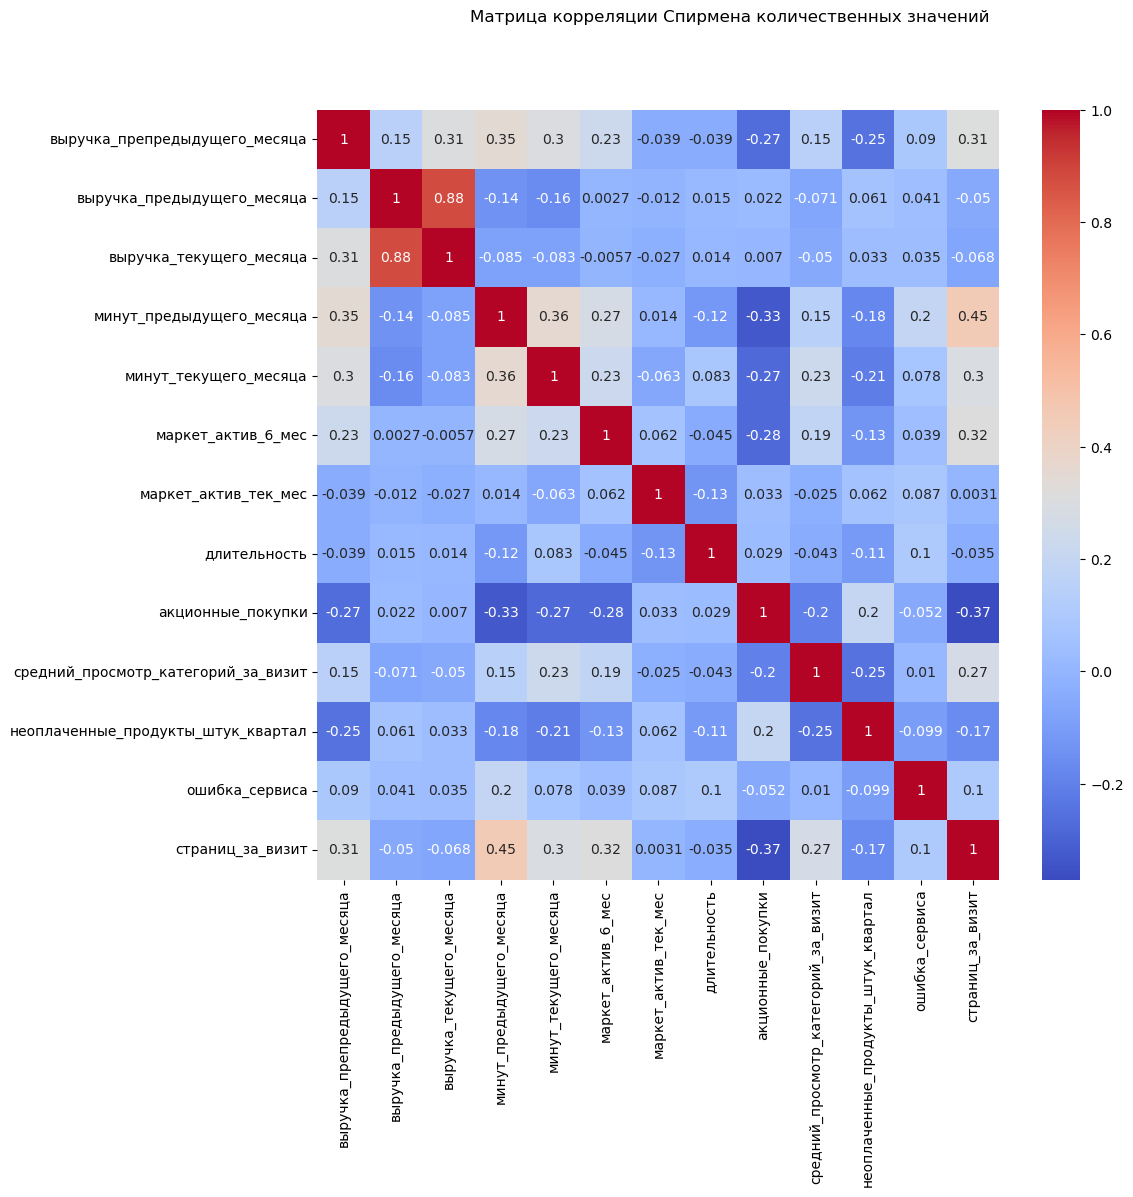

In [38]:
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции Спирмена количественных значений')
sns.heatmap(df.drop('id', axis=1).corr(method="spearman", numeric_only=True), annot=True, cmap='coolwarm');

Построим тепловую карту корреляции phi(k) для количественных данных распределение которых ненормальное с выбросами.

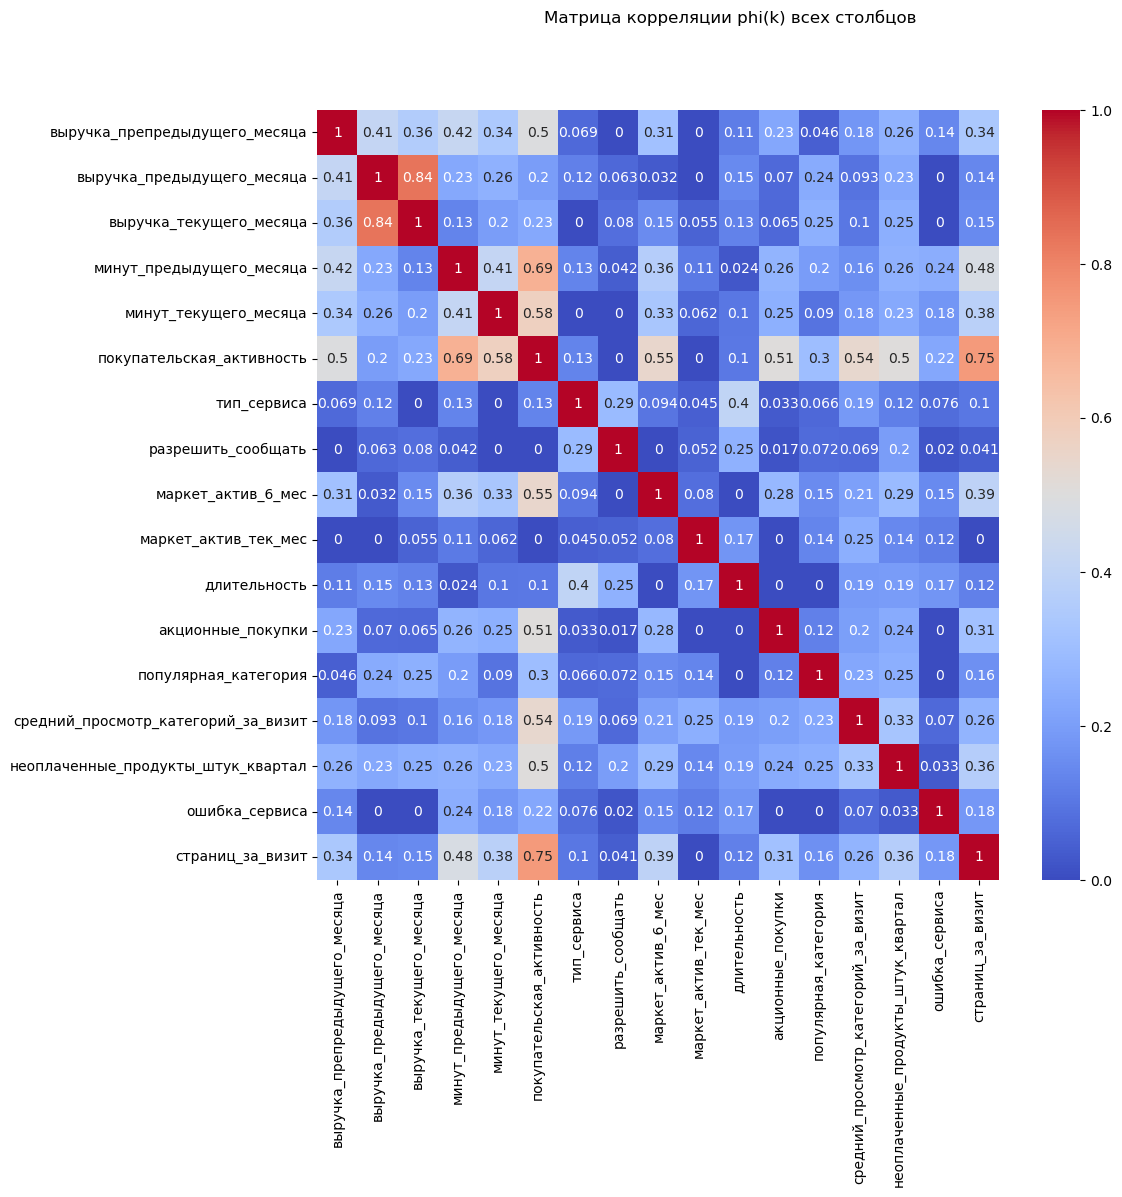

In [39]:
interval_cols = ['выручка_препредыдущего_месяца',
                 'выручка_предыдущего_месяца', 
                 'выручка_текущего_месяца',
                 'минут_предыдущего_месяца',
                 'минут_текущего_месяца',
                 'маркет_актив_6_мес',
                 'маркет_актив_тек_мес',
                 'длительность',
                 'акционные_покупки',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит'
                ]
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции phi(k) всех столбцов')
sns.heatmap(df.drop('id', axis=1).phik_matrix(interval_cols=interval_cols), annot=True, cmap='coolwarm');

#### Вывод по корреляционному анализу:
1. Между входными параметрами отсутствует связь выше 0,9 следовательно при обучении модели учитывать мультиколлинеарность не надо.
2. Максимальное значение корреляция Спирмена (непараметрическая мера оценивающая монотонность связи) corr(S) = 0,88
3. Максимальное значение корреляция phi(k) (учитывает нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае бинарного нормального распределения входных данных) phi(k) = 0,84

## 6 Использование пайплайнов

### 6.1 Подготовка данных

In [40]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Отделение целевого признака
X = df.drop(['покупательская_активность', 'id'], axis=1)
y = df['покупательская_активность']
# Перевод в числовой признак 0 = Прежний уровень, 1 = Снизилась
y = y.apply(lambda x: 0 if x=='Прежний уровень' else 1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((972, 16), (325, 16), (972,), (325,))

In [41]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать',                  #6
               'популярная_категория'                #11
              ]
ord_columns = ['тип_сервиса'                         #5
               
              ]
num_columns = ['выручка_препредыдущего_месяца',       #0
               'выручка_предыдущего_месяца',          #1
               'выручка_текущего_месяца',             #2
               'минут_предыдущего_месяца',            #3
               'минут_текущего_месяца',               #4
               'маркет_актив_6_мес',                  #7
               'маркет_актив_тек_мес',                #8
               'длительность',                        #9
               'акционные_покупки',                   #10
               'средний_просмотр_категорий_за_визит', #12
               'неоплаченные_продукты_штук_квартал',  #13
               'ошибка_сервиса',                      #14
               'страниц_за_визит'                     #15
              ]

In [42]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт',
                     'премиум'
                    ],
                  
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# Создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### 6.2 Обучение моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC()

+ Для сравнения результатов работы обученных моделей необходимо выбрать универсальную метрику. Такой является `ROC-AUC` - метрика модели машинного обучения, которая отображаеть истинную и постоянную способность модели к прогнозированию. У хорошей модели классификации показатель `ROC-AUC` > 0.9, и в должен стремиться к 1. При этом указанное значение должно выбираться по значению на тестовой выборке.
+ Кривая ROC отображает частоту истинных положительных и ложных срабатываний при различных порогах классификации, тогда как AUC показывает совокупную меру производительности модели машинного обучения по всем возможным порогам классификации.
+ ROC означает «Receiver Operating Characteristic» (кривая рабочих характеристик приемника). Это график, который показывает эффективность модели машинного обучения при решении задачи классификации, отображая частоту истинных срабатываний и частоту ложных срабатываний. AUC означает «Area Under the Curve» (площадь под кривой). Она используется для измерения всей площади под кривой ROC.

### 6.2.1 KNeighborsClassifier()

In [43]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

param_grid = [
    # Словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
        
        
    }
]

knc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

knc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', knc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', knc.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                          

In [44]:
roc_auc_knc_train = roc_auc_score(y_train, knc.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на убучающей выборке:', roc_auc_knc_train)

Площадь ROC-кривой на убучающей выборке: 0.9494127038942284


In [45]:
choosing_model_separately = pd.DataFrame(knc.cv_results_).sort_values(
    by=['rank_test_score']
).head(1)
choosing_model_separately['roc_auc_proba_train'] = roc_auc_knc_train
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'roc_auc_proba_train', 'params']]

,rank_test_score,param_models,mean_test_score,roc_auc_proba_train,params
9,1,KNeighborsClassifier(n_neighbors=9),0.905009,0.949413,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__n_neighbors': 9, 'models': KNeighborsClassifier(n_neighbors=9)}"


### 6.2.2 DecisionTreeClassifier()

In [46]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 700),
        'models__max_features': range(2, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

dtc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

dtc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', dtc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', dtc.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                          

In [47]:
roc_auc_dtc_train = roc_auc_score(y_train, dtc.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на убучающей выборке:', roc_auc_dtc_train)

Площадь ROC-кривой на убучающей выборке: 1.0


In [48]:
choosing_model_1 = pd.DataFrame(dtc.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_1['roc_auc_proba_train'] = roc_auc_dtc_train
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'roc_auc_proba_train', 'params']]

,rank_test_score,param_models,mean_test_score,roc_auc_proba_train,params
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,0.949413,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__n_neighbors': 9, 'models': KNeighborsClassifier(n_neighbors=9)}"
1,1,"DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)",0.816610,1.000000,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__max_features': 15, 'models__max_depth': 57, 'models': DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)}"


### 6.2.3 LogisticRegression()

In [49]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

param_grid = [
    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

lr = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

lr.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', lr.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', lr.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                   

In [50]:
roc_auc_lr_train = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на убучающей выборке:', roc_auc_lr_train)

Площадь ROC-кривой на убучающей выборке: 0.9080642774172427


In [51]:
choosing_model_1 = pd.DataFrame(lr.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_1['roc_auc_proba_train'] = roc_auc_lr_train
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'roc_auc_proba_train', 'params']]

,rank_test_score,param_models,mean_test_score,roc_auc_proba_train,params
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,0.949413,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__n_neighbors': 9, 'models': KNeighborsClassifier(n_neighbors=9)}"
1,1,"DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)",0.816610,1.000000,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__max_features': 15, 'models__max_depth': 57, 'models': DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)}"
2,1,"LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')",0.898449,0.908064,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories=[['стандарт', 'премиум']], handle_unknown='use_encoded_value', unknown_value=nan), SimpleImputer(strategy='most_frequent')), 'preprocessor__num': MinMaxScaler(), 'models__C': 2, 'models': LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')}"


### 6.2.4 SVC()

In [52]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE))
])

param_grid = [
    # Словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

svc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

svc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', svc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели :', svc.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                          

In [53]:
roc_auc_svc_train = roc_auc_score(y_train, svc.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на убучающей выборке:', roc_auc_svc_train)

Площадь ROC-кривой на убучающей выборке: 0.9689511192038426


In [54]:
choosing_model_1 = pd.DataFrame(svc.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_1['roc_auc_proba_train'] = roc_auc_svc_train
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'roc_auc_proba_train', 'params']].sort_values(by=['mean_test_score'], ascending = False)

,rank_test_score,param_models,mean_test_score,roc_auc_proba_train,params
3,1,"SVC(degree=9, probability=True, random_state=42)",0.914688,0.968951,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 9, 'models': SVC(degree=9, probability=True, random_state=42)}"
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,0.949413,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': RobustScaler(), 'models__n_neighbors': 9, 'models': KNeighborsClassifier(n_neighbors=9)}"
2,1,"LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')",0.898449,0.908064,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories=[['стандарт', 'премиум']], handle_unknown='use_encoded_value', unknown_value=nan), SimpleImputer(strategy='most_frequent')), 'preprocessor__num': MinMaxScaler(), 'models__C': 2, 'models': LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')}"
1,1,"DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)",0.816610,1.000000,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__max_features': 15, 'models__max_depth': 57, 'models': DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)}"


In [55]:
roc_auc_svc_test = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
print('Площадь ROC-кривой на тестовой выборке:', roc_auc_svc_test)
roc_auc_svc_km = (roc_auc_svc_test - roc_auc_svc_train) / roc_auc_svc_train*100
print(f'Потеря качества на тестовой выборке  = {roc_auc_svc_km:.2f} %')

Площадь ROC-кривой на тестовой выборке: 0.9175493500240732
Потеря качества на тестовой выборке  = -5.30 %


### 6.3 Определим лучшую модель, используя результаты обучения и выбранную метрику

Соединим полученные результаты при отдельном тестировании и общем поиске лучших моделей. Видно, что модели не совпадают, это могло произойти так как мы использовали `RandomizedSearchCV` при отборе моделей.

In [56]:
choosing_model_separately = choosing_model_separately.sort_values(by=['mean_test_score'], ascending = False).head(1)
choosing_model_separately[[
    'param_models',
    'params',
    'mean_test_score'
]]

,param_models,params,mean_test_score
3,"SVC(degree=9, probability=True, random_state=42)","{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 9, 'models': SVC(degree=9, probability=True, random_state=42)}",0.914688


In [57]:
print('Площадь ROC-кривой на тренировочной выборке:', roc_auc_svc_train)
roc_auc_svc_test = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])
print('Площадь ROC-кривой на тестовой выборке:', roc_auc_svc_test)
roc_auc_svc_km = (roc_auc_svc_test - roc_auc_svc_train) / roc_auc_svc_train*100
print(f'Потеря качества на тестовой выборке  = {roc_auc_svc_km:.2f} %')

Площадь ROC-кривой на тренировочной выборке: 0.9689511192038426
Площадь ROC-кривой на тестовой выборке: 0.9175493500240732
Потеря качества на тестовой выборке  = -5.30 %


#### Вывод по использованию пайплайнов и выбора лучшей модели:

Лучшая модель и её параметры:\
`SVC(degree=9, probability=True, random_state=42))`, \
`'preprocessor__ord': (SimpleImputer(strategy='most_frequent'),\
OneHotEncoder(drop='first', sparse=False)), \
'preprocessor__num': StandardScaler(), \
'models__kernel': 'rbf', \
'models__degree': 9`

Параметры модели удвлетворительные:
+ Площадь ROC-кривой на тренировочной выборке: 0.9689511192038426
+ Площадь ROC-кривой на тестовой выборке: 0.9175493500240732
+ Потеря качества на тестовой выборке  = -5.30 %%

## 7 Анализ важности признаков

### 7.1 Оценка важности признаков для лучшей модели и построение графика важности с помощью метода SHAP

К сожалению в библиотеке SHAP нет хорошей библиотеки, для оценки важности признаков выбранной лучшей модели:\
`SVC(degree=5, probability=True, random_state=42)`\
В тоже самое время для оценки важности признаков, с погрешностями можно оценить на близкой модели выбранной автоматическим методом:\
`DecisionTreeClassifier(max_depth=302, max_features=14, random_state=42)`

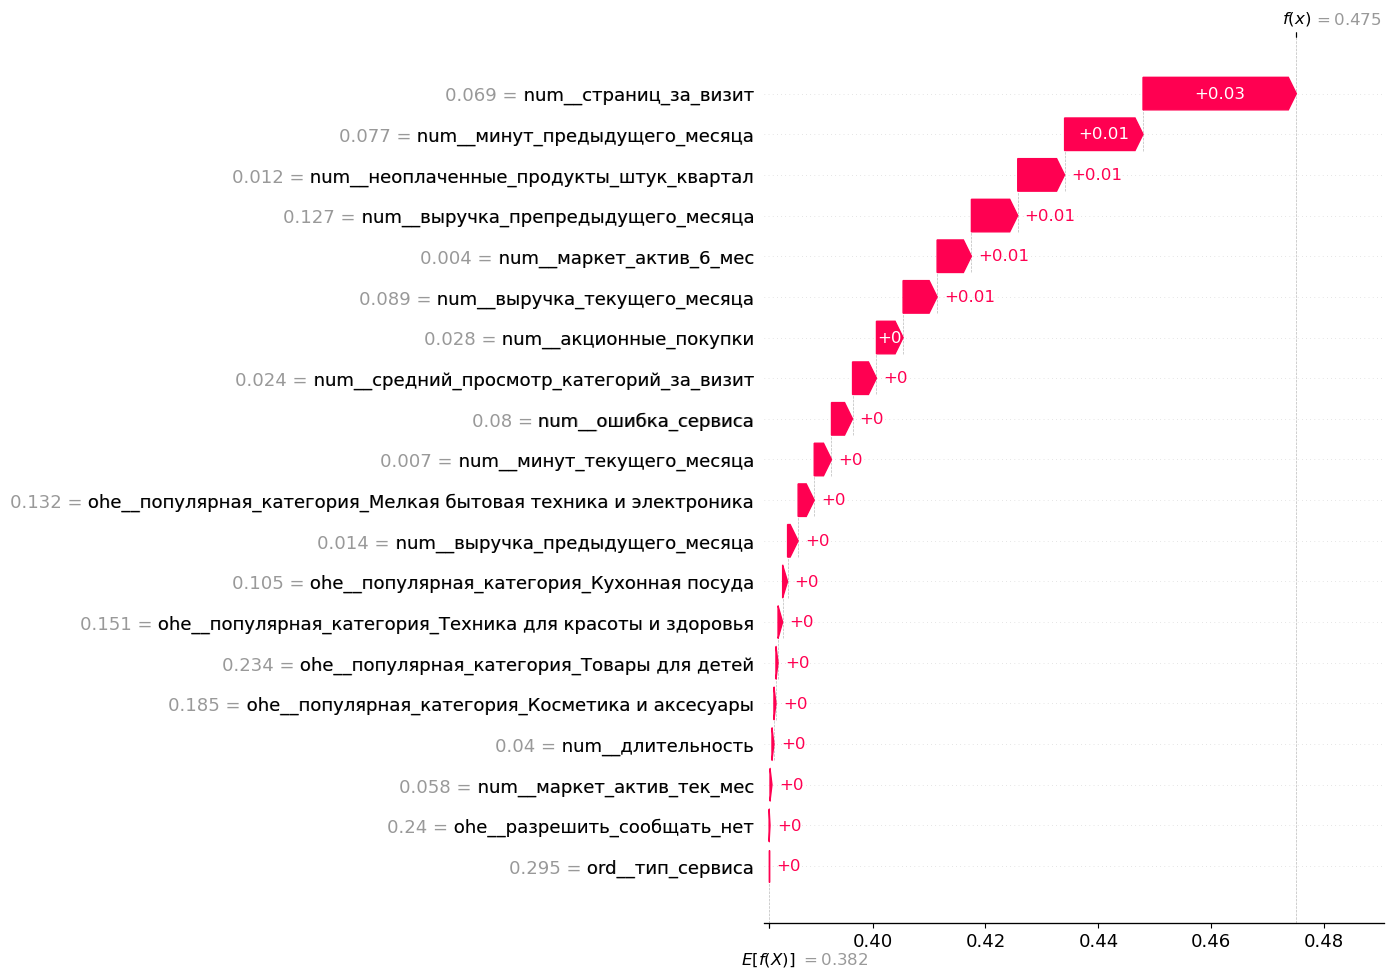

In [58]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(degree=5, probability=True, random_state=RANDOM_STATE))
])

pipe_final.fit(X_train, y_train)

# Получение лучшей модели
best_model = dtc.best_estimator_

# Применение преобразований к X_test
X_transformed = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())

# Создание explainer с использованием преобразованного X_test
explainer = shap.TreeExplainer(best_model.named_steps['models'])

# Вычисление значений SHAP
shap_values = explainer(X_transformed)

# Визуализация
shap_values_sum = sum(shap_values)

shap.plots.waterfall((shap_values_sum / len(shap_values)).abs[:, 1], max_display=20)


Анализ значимости признаков модели:\
`SVC(degree=5, probability=True, random_state=42)`\
более точно можно провести при помощи библиотеки `permutation_importance`

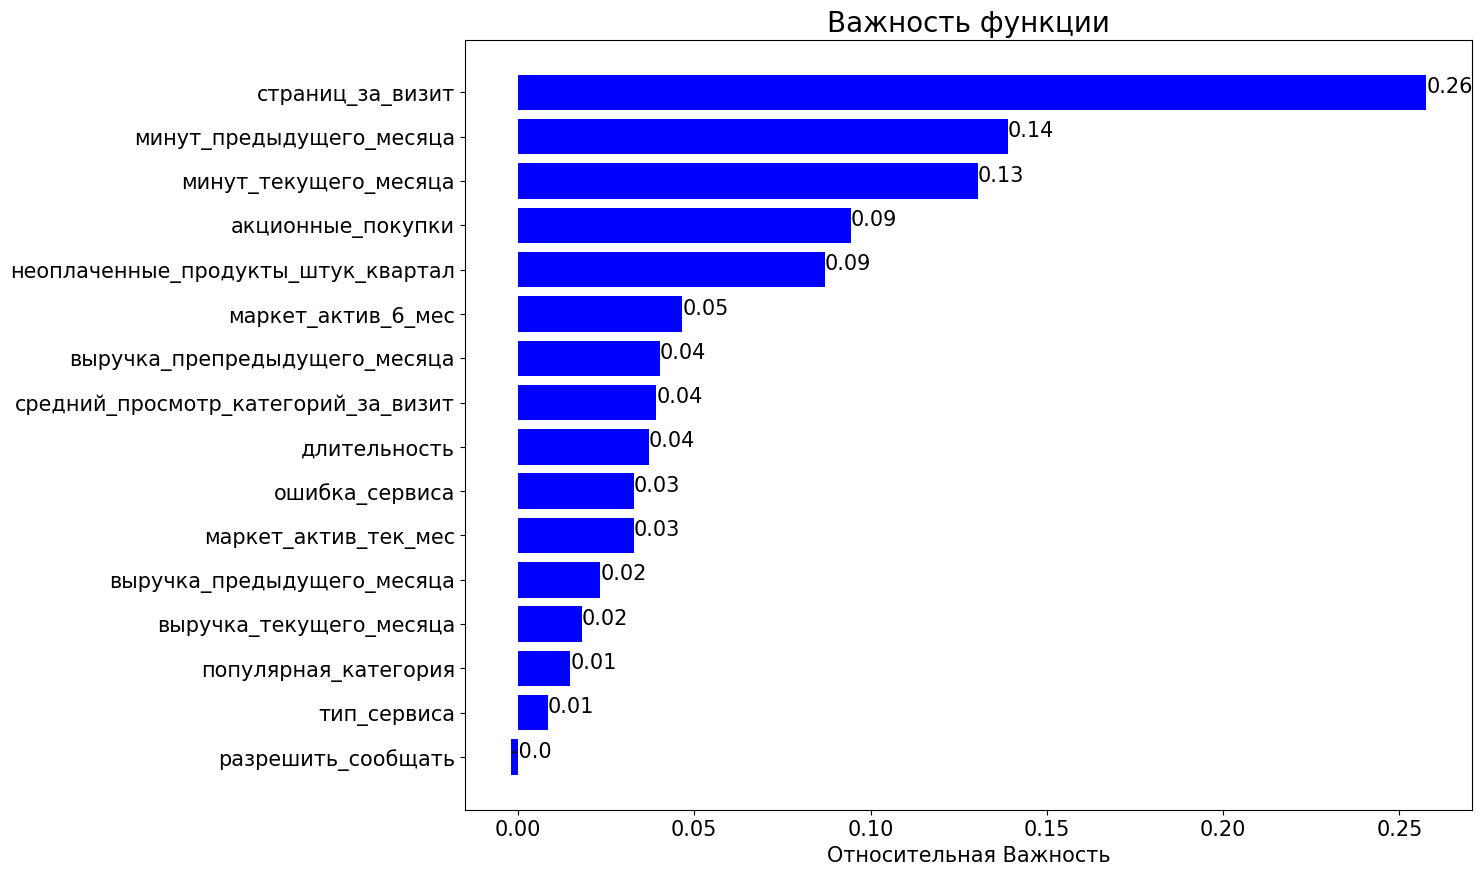

In [59]:
def f_permutation_importance(svm, X_train_svc, y_train):
    perm_importance = permutation_importance(svm, X_train_svc, y_train)
    perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

    feature_names = X_train_svc.columns
    features = np.array(feature_names)

    sorted_idx = perm_importance_normalized.argsort()

    plt.figure(figsize=(13,10))
    plt.title('Важность функции',fontsize=20)
    plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
    plt.xlabel('Относительная Важность', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    for index, value in enumerate(perm_importance_normalized[sorted_idx]):
        plt.text(value, index,
             str(round(value,2)), fontsize=15)

    plt.show()
    
f_permutation_importance(pipe_final, X_train, y_train)

#### Выводы о значимости признаков:
Значения важности признаков значительно меняются в зависимости от применяемых моделей, но большинство из них остаются в важных или незначимых, что указано в предыдущих расчетах.
Отобрана лучшая модель: `SVC(degree=5, probability=True, random_state=42)`\
Наиболее важные признаки (по убывающей):
+ 'страниц_за_визит'
+ 'минут_предыдущего_месяца'
+ 'минут_текущегого_месяца'
+ 'акционные_покупки'
+ 'неоплаченные_продукты_штук_квартал'

Менее важные признаки :
+ 'разрешить сообщать'
+ 'тип сервиса'
+ 'популярная_категория'
+ 'выручка_предыдущего_месяца'

## 8 Сегментация покупателей

### 8.1 Прогноз нашей модели с выбранным порогом и вероятностями.

В соответствии с исследованием, прибыль имеет нормальное распределение. Разобьем клиентов по прибыльности:
+ мало - до 1 квантили
+ нормально от 1 до 3 квантили
+ много - больше 3 квантили

Введем дополнительный столбец в `money`, проведем объединение таблиц.

In [60]:
# Функция расчета предсказаний с учетом изменяемого порога
# Использование функции predict_proba взамен predict
def custom_predict(X, threshold):
    probs = pipe_final.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

In [61]:
# Предсказание на данных с выбранным порогом
predictions_precision = custom_predict(X, threshold=0.5)
X['predictions'] = predictions_precision
X['probs'] = pipe_final.predict_proba(X)[:,1]
X['id'] = df['id']

money['категории_прибыли'] = money['прибыль'].apply(lambda x: 'мало' if x<money['прибыль'].quantile(0.25) 
                                                       else ('много' if x>money['прибыль'].quantile (0.75) 
                                                       else 'нормально'))
X = pd.merge(X, money, on='id', sort=True)

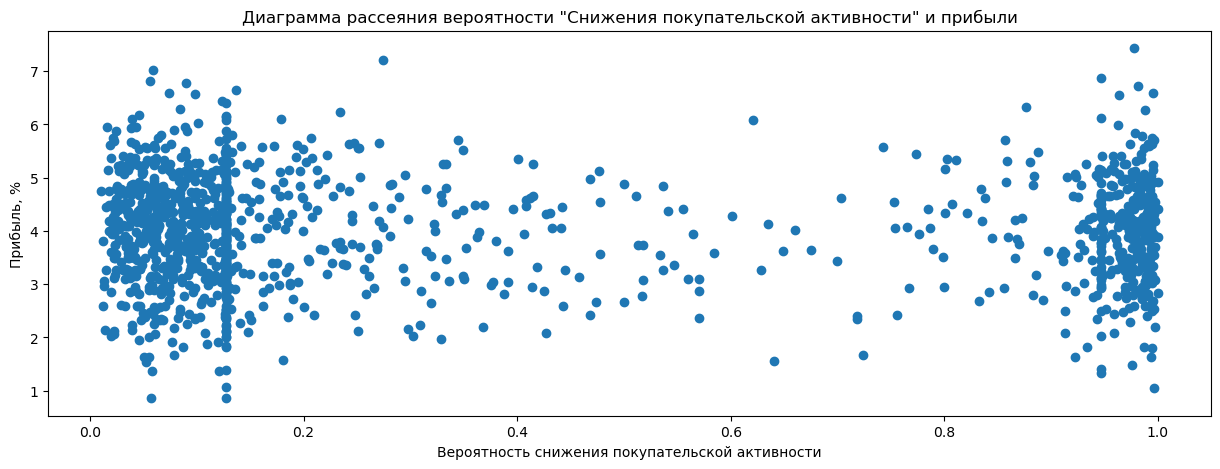

In [62]:
plt.figure(figsize=[15, 5])
plt.scatter(X.probs, X.прибыль);
plt.title('Диаграмма рассеяния вероятности "Снижения покупательской активности" и прибыли')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль, %')
plt.show()

Задача: Клиентам, у которых снизилась покупательская активность, сделать персональное предложение и вернуть их за покупками.

Введем категориальный столбец в данные, для сравнения данных.
Определим границу разделения 0.5.

In [63]:
X['категория_снижения'] = X['probs'].apply(lambda x: 'Снизилась' if x>0.5 else 'Прежний уровень')                          

### 8.2 Исследование группы покупателей. Предложения по работе с сегментом для увеличения покупательской активности

Для работы выделим группу с малым доходом и высокой вероятностью снижения покупательской способности, для сравнения оставим группу с прежним уровнем активности, она покажет целевой уровень куда нужно стремиться и какие решения принимать в разрезе важных признаков, определенных на 7 шаге работы.

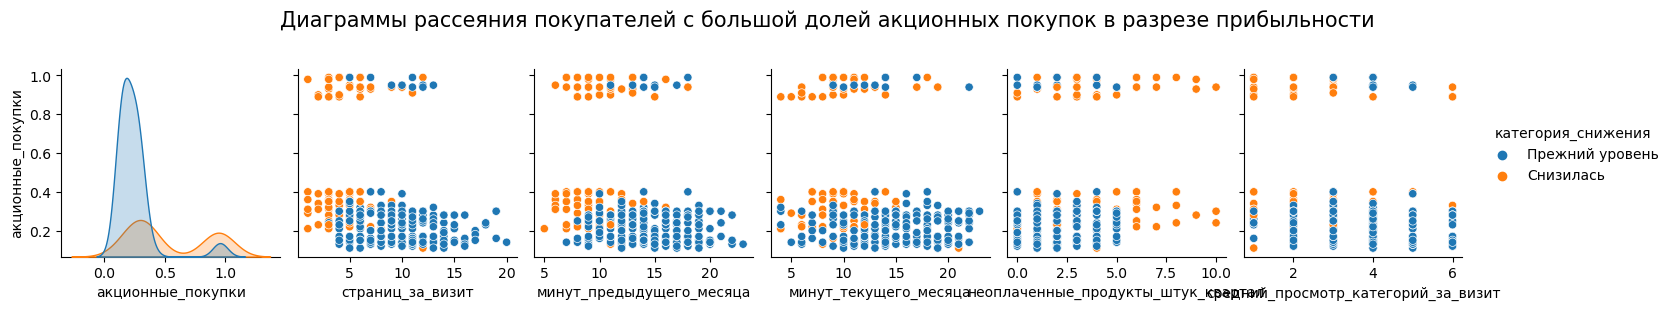

In [64]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['акционные_покупки'
  
  ]

g = sns.pairplot(X.query('категории_прибыли == "мало"'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с большой долей акционных покупок в разрезе прибыльности", y=1.2, fontsize=15)
plt.show()

Выделим группу клиентов, в доле покупок которых акционные товары не превышают 50 %. \
Сформулируем предложение по работе с сегментом для увеличения покупательской активности.

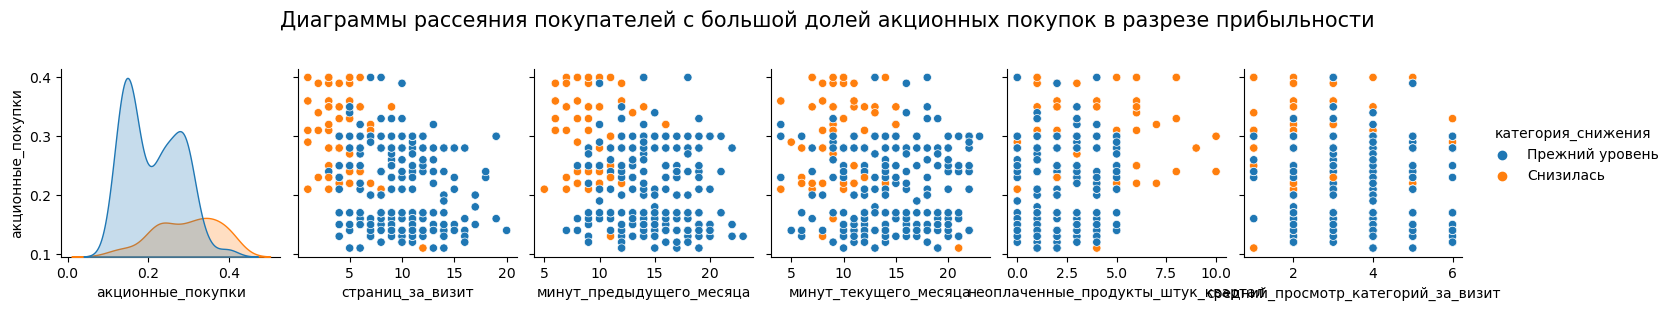

In [65]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['акционные_покупки'
  ]

g = sns.pairplot(X.query('категории_прибыли == "мало" & акционные_покупки < 0.5'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с большой долей акционных покупок в разрезе прибыльности", y=1.2, fontsize=15)
plt.show()

#### Промежуточный вывод:
Группа клиентов, доля акционных товаров у которых не превышает 50%:

В этом сегменте наблюдается снижение покупательской активности. Активность клиентов снижается особенно у тех, у кого доля акционных покупок приближается к 50%. Возможно, это связано с уменьшением рекламных компаний по акциям.

Рекомендации:
+ Выделить этих клиентов в отдельную рабочую группу
+ Активнее предлагать им акционные товары и проводить рекламные компании
+ Удерживать их внимание на страницах сайта, увеличение числа просмотренных страниц приведет к увеличению времени, проведенного за визит. Если визит длится более 10 минут, вероятность сохранения покупательской активности повышается
+ Уведомлять клиентов, если у них в корзине более 6 неоплаченных товаров, чтобы стимулировать их активность

Группа клиентов с высокой прибыльностью и более 4 неоплаченных покупок в корзине:

В этом сегменте также наблюдается значительное снижение покупательской активности.

Рекомендации:

+ Выделить этих клиентов в отдельную рабочую группу
+ Уведомлять их, если в корзине более 6 неоплаченных товаров. Это может вернуть их на сайт увеличить покупательскую активность.

Выделим группу клиентов, с высокой  прибыльностью и количеством неоплаченных покупок в корзине больше 4.\
Сформулируем предложение по работе с сегментом для увеличения покупательской активности.

Прибыль от клиентов распределена нормально. Определим, что наиболее высокая прибыль клиентов лежит за 3 квантилем нормального распределения.

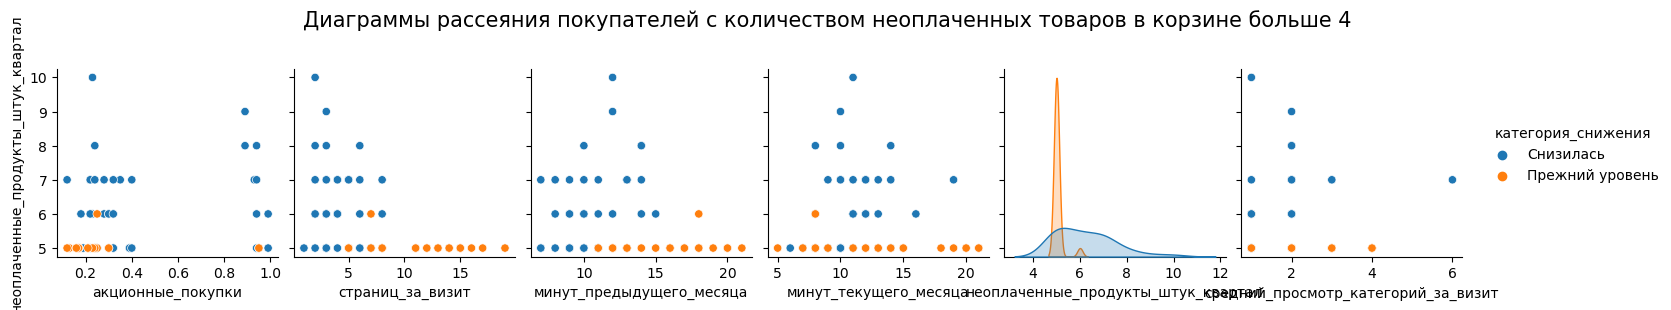

In [66]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['неоплаченные_продукты_штук_квартал'
  
  ]

g = sns.pairplot(X.query('категории_прибыли == "много" & неоплаченные_продукты_штук_квартал > 4'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с количеством неоплаченных товаров в корзине больше 4", y=1.2, fontsize=15)
plt.show()

#### Промежуточный итог 2:

В данном сегменте присутствует значительная доля снижения покупательской активности клиентов.

+ Предлагается выделить таких клиентов в отдельную рабочую группу
+ При количестве неоплаченных продуктов в корзине болше 6, уведомлять об этом покупателя, что возможно приведет покупателя обратно на сайт и увеличит их покупательную активность

#### Вывод по сегментации покупателей:

1. Группа клиентов, доля акционных товаров у которых не превышает 50%

    + В этом сегменте наблюдается снижение покупательской активности, особенно у клиентов, у которых доля акционных покупок приближается к 50%. Возможно, это связано с уменьшением рекламных компаний по акциям.

    Рекомендации:

    + Выделить этих клиентов в отдельную рабочую группу.
    + Активнее предлагать им акционные товары и проводить рекламные компании.
    + Удерживать их внимание на страницах сайта, увеличение числа просмотренных страниц приведет к увеличению времени, проведенного на сайте. При проведении на сайте более 10 минут вероятность сохранения покупательской активности повышается.
    + Уведомлять клиентов, если у них в корзине более 6 неоплаченных товаров, чтобы стимулировать их активность.


2. Группа клиентов с высокой прибыльностью и более 4 неоплаченных покупок в корзине

    + В этом сегменте также наблюдается значительное снижение покупательской активности.

    Рекомендации:

    + Выделить этих клиентов в отдельную рабочую группу.
    + Уведомлять их, если в корзине более 6 неоплаченных товаров. Это может вернуть их на сайт и увеличить покупательскую активность.

Общие рекомендации для обеих групп заключаются в том, чтобы активно предлагать акционные товары, проводить рекламные компании, удерживать внимание на страницах сайта и уведомлять о неоплаченных товарах в корзине.

## 9 Общий вывод

#### Задача исследования

Целью исследования было разработать решение для персонализации предложений постоянным клиентам, чтобы увеличить их покупательскую активность. Для анализа были предоставлены следующие данные:

- **market_file.csv** — данные о поведении покупателя на сайте, коммуникациях с ним и его продуктовом поведении.
- **market_money.csv** — данные о выручке, получаемой магазином от покупателя за период взаимодействия.
- **market_time.csv** — данные о времени, проведенном покупателем на сайте в течение периода.
- **money.csv** — данные о среднемесячной прибыли покупателя за последние три месяца.

#### Предобработка данных

1. Изменены названия столбцов: переведены в нижний регистр и заменены пробелы на подчеркивания.
2. В **market_file**:
   - В колонке "тип_сервиса" данные "стандартт" заменены на "стандарт".
   - Изменены типы столбцов: "маркет_актив_6_мес" и "акционные_покупки" на float.
3. В **market_money**:
   - Изменен тип столбца "выручка" на float.
4. В **market_time**:
   - В колонке "период" данные "предыдцщий_месяц" заменены на "предыдущий_месяц".

#### Анализ данных и подготовка

1. Проведен исследовательский анализ данных.
2. Проведена подготовка и объединение таблиц.
3. Для поиска лучшей модели был проведен корреляционный анализ данных для исключения мультиколлинеарности.
4. Подготовлены пайплайны для отбора лучшей модели в ручном и автоматическом режиме.

#### Модель

Наилучшей моделью была определена **SVC (degree=5, probability=True, random_state=42)** с использованием **RobustScaler** для числовых данных.

#### Важные и малозначимые признаки

При обучении модели можно удалить следующие малозначимые признаки:

+ 'разрешить сообщать'
+ 'тип сервиса'
+ 'популярная_категория'
+ 'выручка_предыдущего_месяца'

Наиболее значимые признаки, на которые следует обратить внимание для увеличения покупательской активности (по убыванию значимости):

+ 'страниц_за_визит'
+ 'минут_предыдущего_месяца'
+ 'минут_текущегого_месяца'
+ 'акционные_покупки'
+ 'неоплаченные_продукты_штук_квартал'

#### Сегменты клиентов и рекомендации

1. Группа клиентов, доля акционных товаров у которых не превышает 50%

    + В этом сегменте наблюдается снижение покупательской активности, особенно у клиентов, у которых доля акционных покупок приближается к 50%. Возможно, это связано с уменьшением рекламных компаний по акциям.

    Рекомендации:

    + Выделить этих клиентов в отдельную рабочую группу.
    + Активнее предлагать им акционные товары и проводить рекламные компании.
    + Удерживать их внимание на страницах сайта, увеличение числа просмотренных страниц приведет к увеличению времени, проведенного на сайте. При проведении на сайте более 10 минут вероятность сохранения покупательской активности повышается.
    + Уведомлять клиентов, если у них в корзине более 6 неоплаченных товаров, чтобы стимулировать их активность.


2. Группа клиентов с высокой прибыльностью и более 4 неоплаченных покупок в корзине

    + В этом сегменте также наблюдается значительное снижение покупательской активности.

    Рекомендации:

    + Выделить этих клиентов в отдельную рабочую группу.
    + Уведомлять их, если в корзине более 6 неоплаченных товаров. Это может вернуть их на сайт и увеличить покупательскую активность.